In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('advertising.csv')
df.sample(5)

,TV,Radio,Newspaper,Sales
23,228.3,16.9,26.2,20.5
69,216.8,43.9,27.2,22.3
55,198.9,49.4,60.0,23.7
17,281.4,39.6,55.8,24.4
199,232.1,8.6,8.7,18.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe(include = 'all')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.duplicated().sum()

0

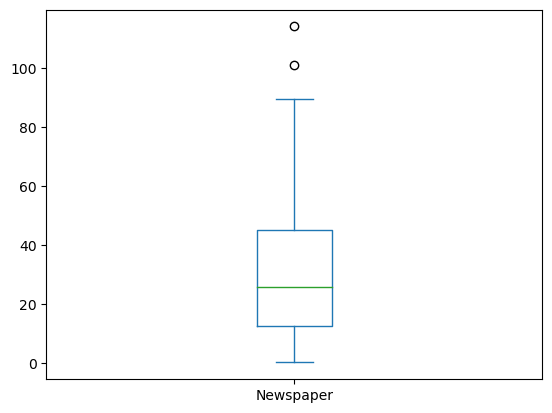

In [7]:
df['Newspaper'].plot( kind = 'box')
plt.show()

In [8]:
#Remove outliers
p25 = df['Newspaper'].quantile(0.25)
p75 = df['Newspaper'].quantile(0.75)

In [9]:
p75

45.1

In [10]:
iqr = p75 - p25
iqr

32.35

In [11]:
upper_value = p75 + 1.5 * iqr
lower_value = p25 - 1.5 * iqr

In [12]:
df = df[df['Newspaper'] < upper_value]
df.shape

(198, 4)

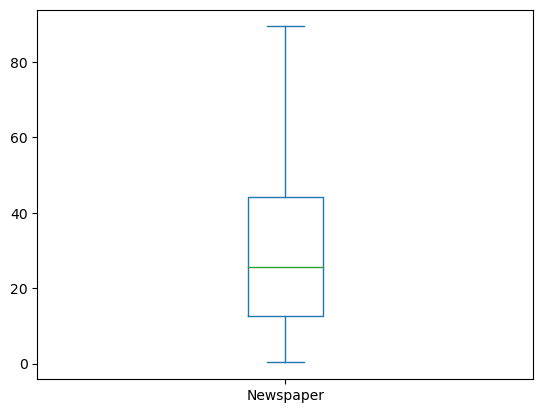

In [13]:
df['Newspaper'].plot( kind = 'box')
plt.show()

In [14]:
df.describe(include = 'all')

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,15.100000
std,85.443221,14.862111,20.446303,5.271184
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,11.000000
50%,149.750000,22.400000,25.600000,16.000000
75%,218.475000,36.325000,44.050000,18.975000
max,293.600000,49.600000,89.400000,27.000000


In [15]:
#EDA
df.sample(7)

,TV,Radio,Newspaper,Sales
52,216.4,41.7,39.6,22.6
124,229.5,32.3,74.2,19.7
26,142.9,29.3,12.6,15.0
32,97.2,1.5,30.0,13.2
176,248.4,30.2,20.3,20.2
120,141.3,26.8,46.2,15.5
41,177.0,33.4,38.7,17.1


In [16]:
import seaborn as sb

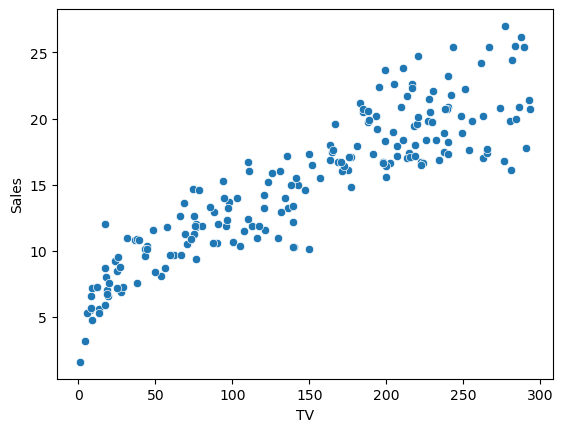

In [17]:
sb.scatterplot( x = 'TV', y = 'Sales' , data = df)
plt.show()

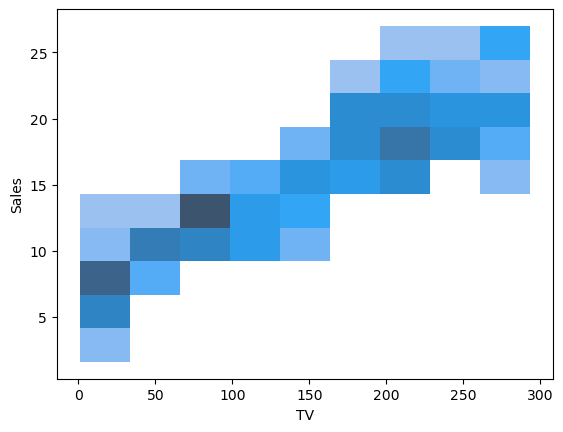

In [18]:
sb.histplot( x = 'TV', y = 'Sales' , data = df)
plt.show()

In [19]:
df['TV'].corr(df['Sales'])

0.8999744824311822

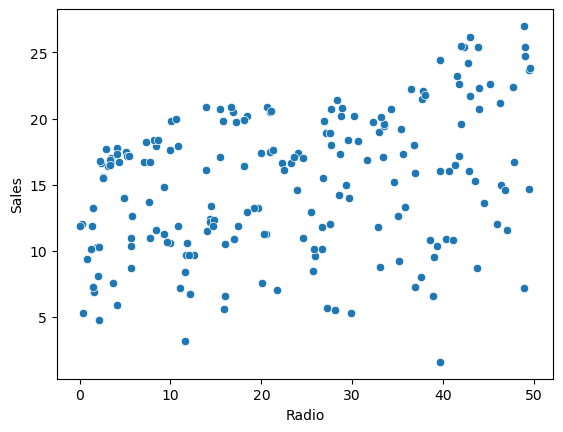

In [20]:
sb.scatterplot( x = 'Radio', y = 'Sales' , data = df)
plt.show()

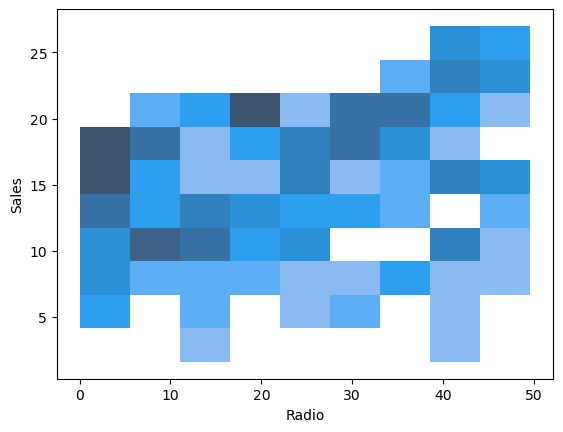

In [21]:
sb.histplot( x = 'Radio', y = 'Sales' , data = df)
plt.show()

In [22]:
df['Radio'].corr(df['Sales'])

0.3485656488396934

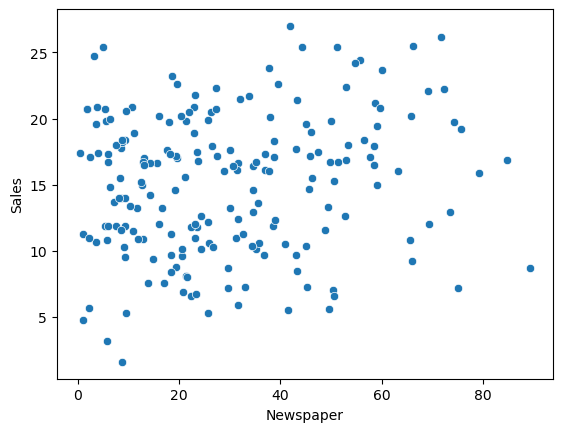

In [23]:
sb.scatterplot( x = 'Newspaper', y = 'Sales' , data = df)
plt.show()

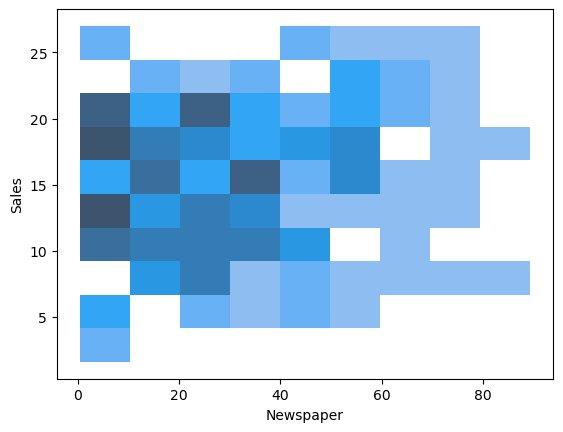

In [24]:
sb.histplot( x = 'Newspaper', y = 'Sales' , data = df)
plt.show()

In [25]:
df['Newspaper'].corr(df['Sales'])

0.15176444459336988

<Axes: >

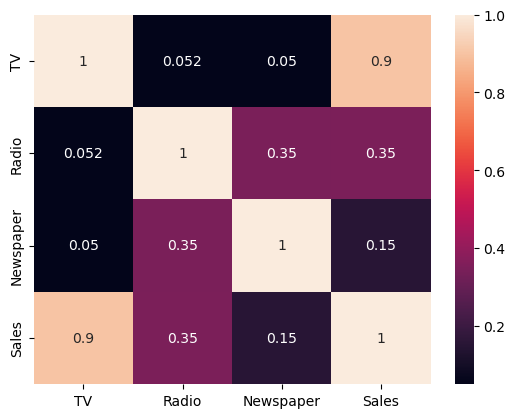

In [26]:
sb.heatmap(df.corr(), annot = True )

In [35]:
#feature engineering
df.sample(3)

,TV,Radio,Newspaper,Sales
46,89.7,9.9,35.7,10.6
59,210.7,29.5,9.3,18.4
199,232.1,8.6,8.7,18.4


In [29]:
pip install mlxtend 

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 1.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 1.4 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 2.6 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 2.9 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 3.3 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 3.9 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.4 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use update

In [90]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [91]:
x = df[['TV','Radio','Newspaper']]
y = df[['Sales']]

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 902)

model = LinearRegression()


In [123]:
fs = efs(model,
         min_features=1,
         max_features=3,
         scoring='r2',
         print_progress=True,
         cv=5)

In [124]:
s = fs.fit(x_train,y_train)
s.best_score_

C:\Users\Jhanvi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Jhanvi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Jhanvi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Jhanvi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Jhanvi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is de

0.868129807046679

In [125]:
s.best_feature_names_

('TV', 'Radio')

# Model Creation

In [133]:
x1 = df[['TV','Radio']]
y1 = df[['Sales']]

In [134]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.2, random_state = 902)

model = LinearRegression()


In [135]:
model.fit(x_train,y_train)
pre = model.predict(x_test)

In [136]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,pre))
print("MSE",mean_squared_error(y_test,pre))
print("R2 score",r2_score(y_test,pre)*100)

MAE 0.9200832713132836
MSE 1.372048625649655
R2 score 95.84542115278012
